# Problem Set #9
# MACS 30150, Dr. Evans

# Submitted by- Nipun Thakurele

## Problem 1

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform, randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

## Problem 1(a)

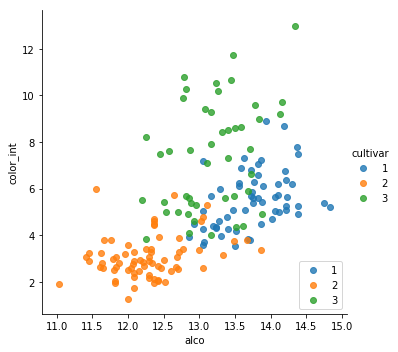

In [19]:
url = 'https://raw.githubusercontent.com/UC-MACSS/persp-model-econ_W19/master/ProblemSets/PS9/data/strongdrink.txt'
df = pd.read_csv(url)
df.head()
#df['cultivar'].value_counts()

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='alco', y='color_int', data=df, fit_reg=False, hue='cultivar', legend=True)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
plt.show()

## Problem 1(b)

In [20]:
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df['cultivar']

LogReg = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogReg, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search1.fit(X, y)

#print('RandBestEstimator1=', random_search1.best_estimator_, "\n")
print('RandBestParams1=', random_search1.best_params_, "\n")
print('RandBestScore1=', -random_search1.best_score_)

RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'} 

RandBestScore1= 0.11931818181818182


## Problem 1(c)

In [21]:
random_forest = RandomForestClassifier(bootstrap=True, oob_score=True)

param_dist2 = { 'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(random_forest, param_distributions=param_dist2, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search2.fit(X, y)

#print('RandBestEstimator2=', random_search2.best_estimator_, "\n")
print('RandBestParams2=', random_search2.best_params_, "\n")
print('RandBestScore2=', -random_search2.best_score_)

RandBestParams2= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 192} 

RandBestScore2= 0.13636363636363635


## Problem 1(d)

In [22]:
svm_classifier = SVC(kernel='rbf')

param_dist3 = { 'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}

random_search3 = RandomizedSearchCV(svm_classifier, param_distributions=param_dist3, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')

random_search3.fit(X, y)

#print('RandBestEstimator3=', random_search3.best_estimator_, "\n")
print('RandBestParams3=', random_search3.best_params_, "\n")
print('RandBestScore3=', -random_search3.best_score_)


RandBestParams3= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True} 

RandBestScore3= 0.14772727272727273


## Problem 1(e)

In [23]:
mhl_nn = MLPClassifier(solver='lbfgs')

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mhl_nn, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)

#print('RandBestEstimator4=', random_search4.best_estimator_, "\n")
print('RandBestParams4=', random_search4.best_params_, "\n")
print('RandBestScore4=', -random_search4.best_score_)



RandBestParams4= {'activation': 'relu', 'alpha': 0.23318052236376277, 'hidden_layer_sizes': 18} 

RandBestScore4= 0.09090909090909091


## Problem 1(f)

The classifier models and their MSE (approximately) are as follows: <br>
&nbsp;&nbsp;    Random Forest: 0.136 <br>
&nbsp;&nbsp;    Support Vector Machines: 0.147 <br>
&nbsp;&nbsp;    Multiple hidden layer Neural Network: 0.090 <br>

Out of the three classifier models computed above, multiple hidden layer neural network model is the best
predictor of cutivar as it has the lowest MSE of all the three models.